In [35]:
from qiskit import *
from qiskit.circuit.library import *
from qiskit.visualization import circuit_drawer

In [41]:
# B u i l d i n g an o r a c l e for the f u n c t i o n
# f ( x ) = x2x3 + x1 x2 x3 + x2 x3 x4 + x1 x2 x3 x4
# This is the U_f .
from qiskit.circuit.library import ZGate
def oracle():
    orcl = QuantumCircuit(4)
    orcl.x(3)
    orcl.append(ZGate().control(3,ctrl_state='001'),range(4))
    orcl.x(3)
    return orcl

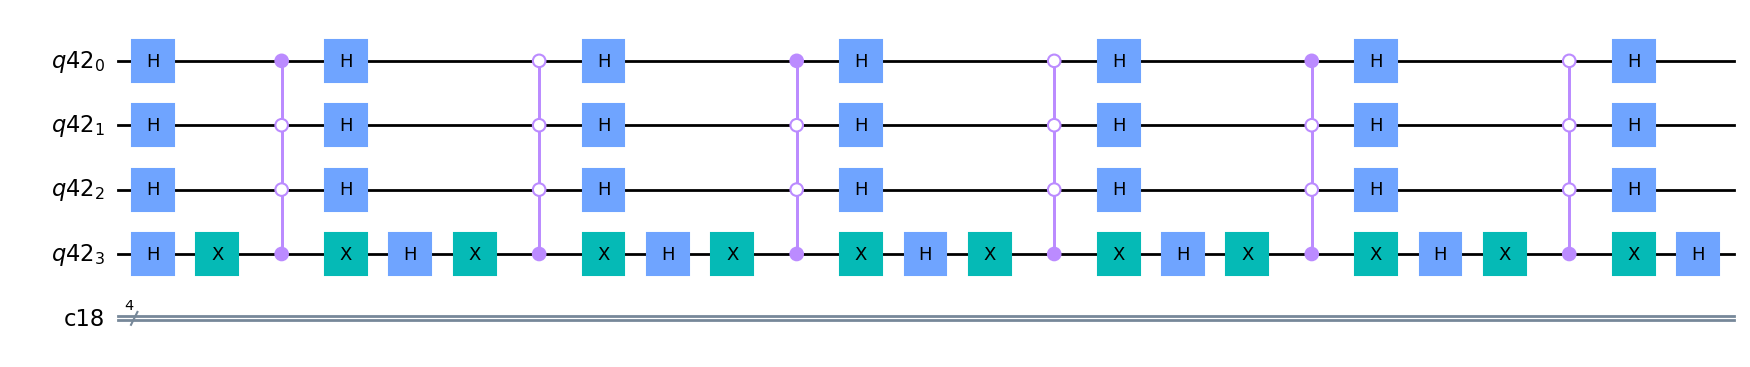

In [52]:
num_iter=3

q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q,c)

# init initial stage to equal superposition
qc.h(range(4)) 

#grover's iterate for num_iter time
for k in range(num_iter):
    #qc.append(oracle(),range(4))
    # using orcl here itself
    qc.x(3)
    qc.append(ZGate().control(3,ctrl_state='001'),range(4))
    qc.x(3)
    # end
    qc.h(range(4))
    qc.x(3)
    qc.append(ZGate().control(3, ctrl_state='000'), range(4))
    qc.x(3)
    qc.h(range(4))

circuit_drawer(qc, output='mpl')


In [54]:
for i in range(4):
    qc.measure(i,3-i)
    
    

In [55]:
backend = Aer.get_backend('qasm_simulator')
qjob = execute(qc, backend, shots=100)
counts = qjob.result().get_counts()
print(counts)

{'1001': 1, '1100': 1, '1000': 98}
